## Problem Statement :

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the 
people of backward countries with basic amenities and relief during the time of disasters and natural calamities. 
HELP International have been able to raise around $ 10 million. This money now needs to be allocated strategically and 
effectively. Hence, inorder to decide the selection of the countries that are in the direst need of aid, data driven decisions 
are to be made. Thus, it becomes necessary to categorise the countries using socio-economic and health factors that determine the 
overall development of the country. Thus, based on these clusters of the countries depending on their conditions, funds will be allocated
for assistance during the time of disasters and natural calamities. It is a clear cut case of unsupervised learning where we have to 
create clusters of the countries based on the different feature present.

## Objective

The objective of this analysis is to:

- Explore and understand socio-economic and health indicators across countries
- Identify key patterns and relationships among variables
- Prepare the data for clustering models that will categorize countries based on development and humanitarian need


In [16]:
# !pip install kaleido
# !pip install plotly
# !pip install -U nbformat

In [17]:
# import kaggle
import zipfile
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import kaleido
import numpy as np

In [18]:
# Define paths
dataset_name = "rohan0301/unsupervised-learning-on-country-data"
download_path = "../Data"
zip_path = os.path.join(download_path, f"{os.path.basename(dataset_name)}.zip")

In [19]:
file_path = '../Data/Country-data.csv'

# Load dataset
# The dataset contains country-level socio-economic and health indicators
if os.path.exists(file_path):
    dataset_df = pd.read_csv(file_path)
else:
    !kaggle datasets download -d {dataset_name} -p {download_path}
    # Unzip dataset
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(download_path)
    dataset_df = pd.read_csv(file_path)

Dataset Attributes
- country : Name of the country
- child_mort : Death of children under 5 years of age per 1000 live births
- exports : Exports of goods and services per capita. Given as %age of the GDP per capita
- health : Total health spending per capita. Given as %age of GDP per capita
- imports : Imports of goods and services per capita. Given as %age of the GDP per capita
- Income : Net income per person
- Inflation : The measurement of the annual growth rate of the Total GDP
- life_expec : The average number of years a new born child would live if the current mortality patterns are to remain the same
- total_fer : The number of children that would be born to each woman if the current age-fertility rates remain the same.
- gdpp : The GDP per capita. Calculated as the Total GDP divided by the total population.

In [20]:
# Display first few rows to understand structure
dataset_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [21]:
# Check shape, data types, and missing values
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


This step ensures data completeness and verifies that all features are in a usable numeric format before proceeding with exploratory analysis.


In [22]:
# check for country duplication
dataset_df[dataset_df['country'].duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


Each row represents a unique country. No duplicate country records were found.


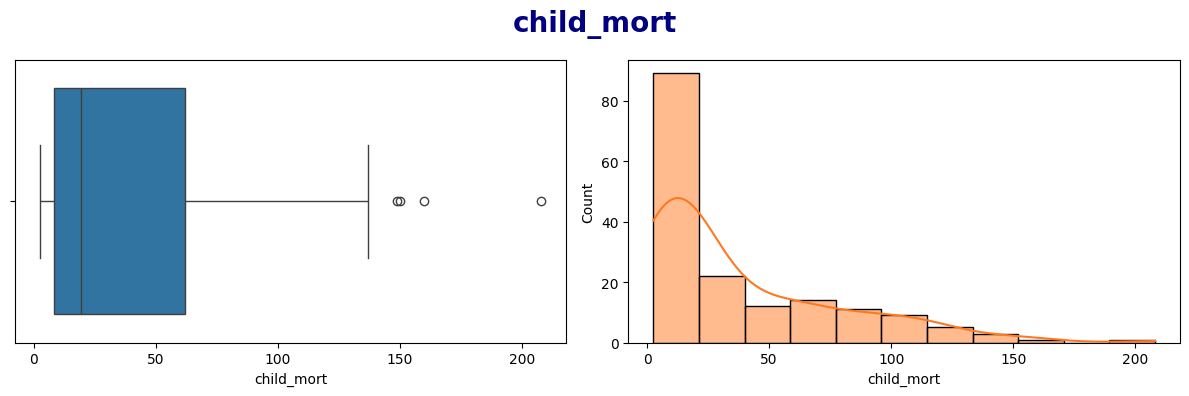

            count      mean        std  min   25%   50%   75%    max
child_mort  167.0  38.27006  40.328931  2.6  8.25  19.3  62.1  208.0


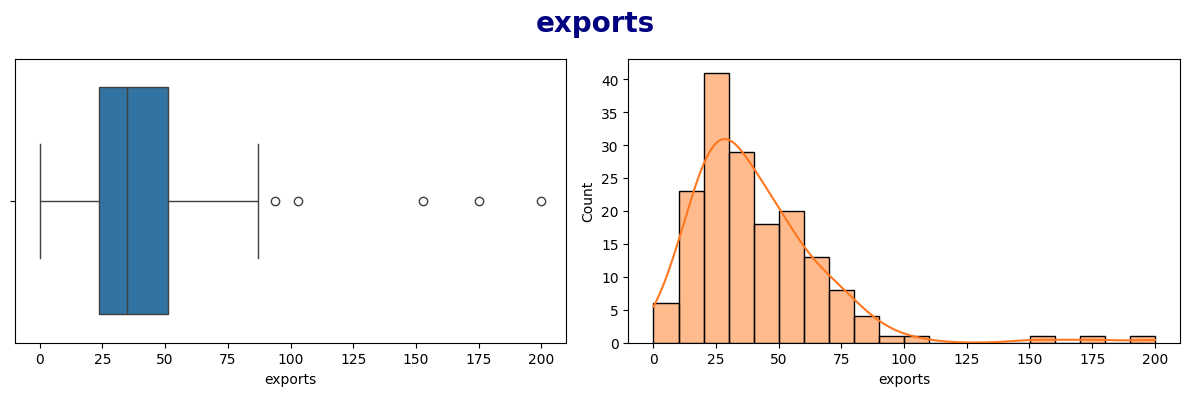

         count       mean       std    min   25%   50%    75%    max
exports  167.0  41.108976  27.41201  0.109  23.8  35.0  51.35  200.0


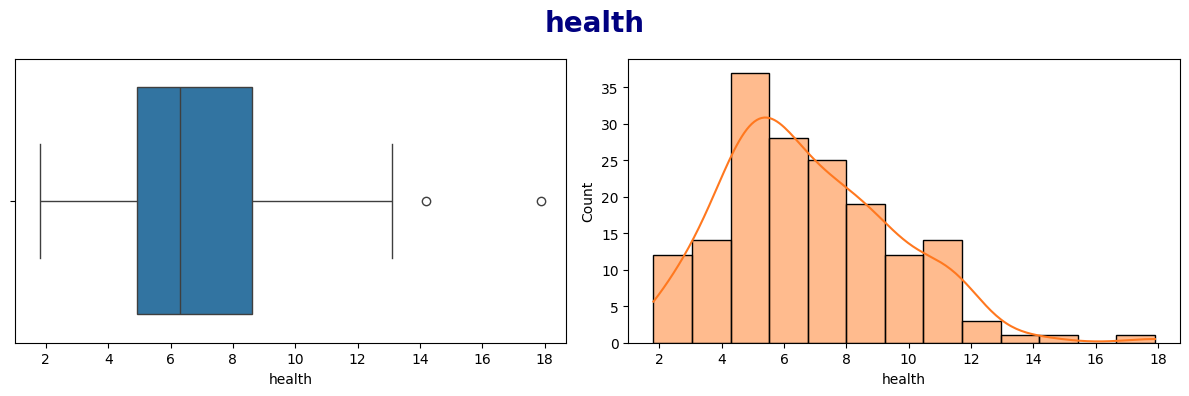

        count      mean       std   min   25%   50%  75%   max
health  167.0  6.815689  2.746837  1.81  4.92  6.32  8.6  17.9


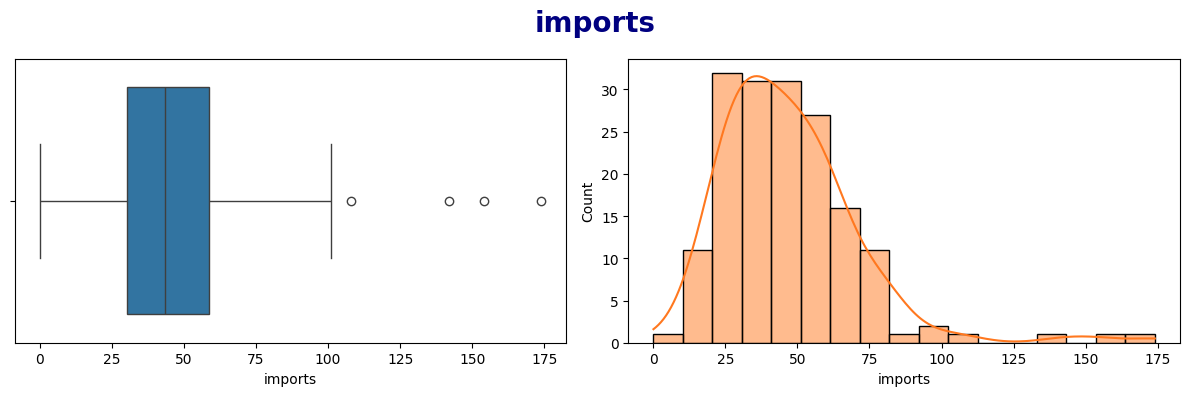

         count       mean        std     min   25%   50%    75%    max
imports  167.0  46.890215  24.209589  0.0659  30.2  43.3  58.75  174.0


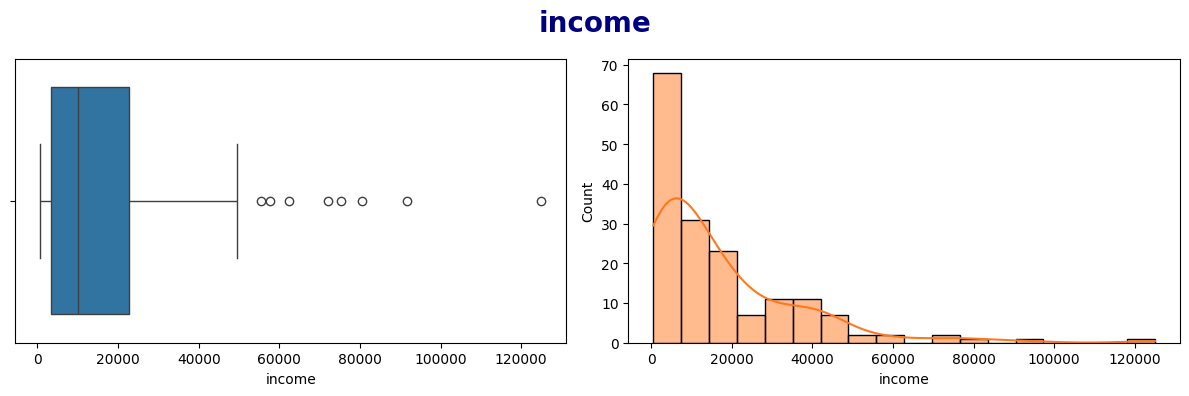

        count          mean           std    min     25%     50%      75%       max
income  167.0  17144.688623  19278.067698  609.0  3355.0  9960.0  22800.0  125000.0


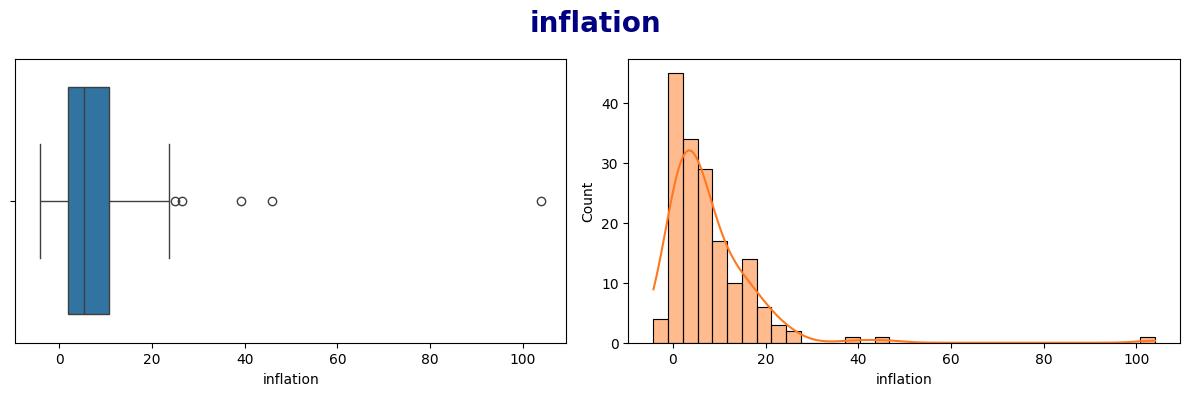

           count      mean        std   min   25%   50%    75%    max
inflation  167.0  7.781832  10.570704 -4.21  1.81  5.39  10.75  104.0


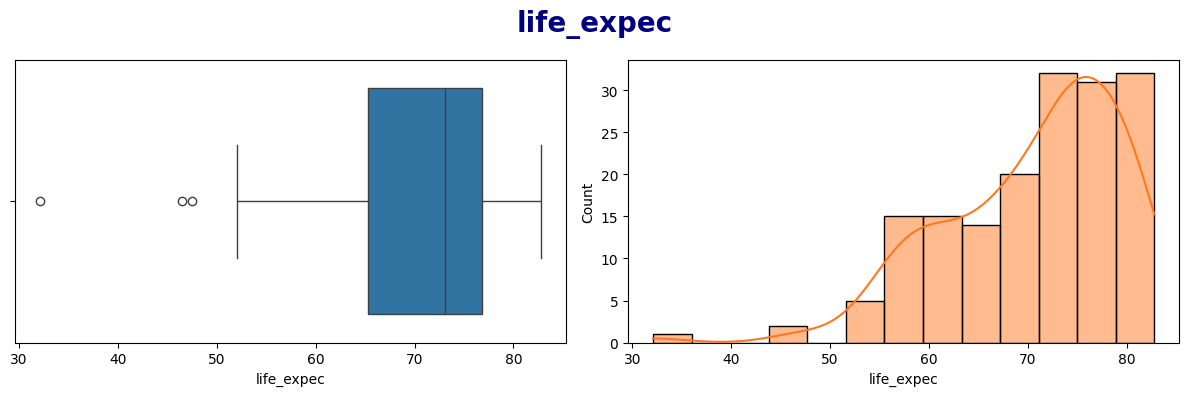

            count       mean       std   min   25%   50%   75%   max
life_expec  167.0  70.555689  8.893172  32.1  65.3  73.1  76.8  82.8


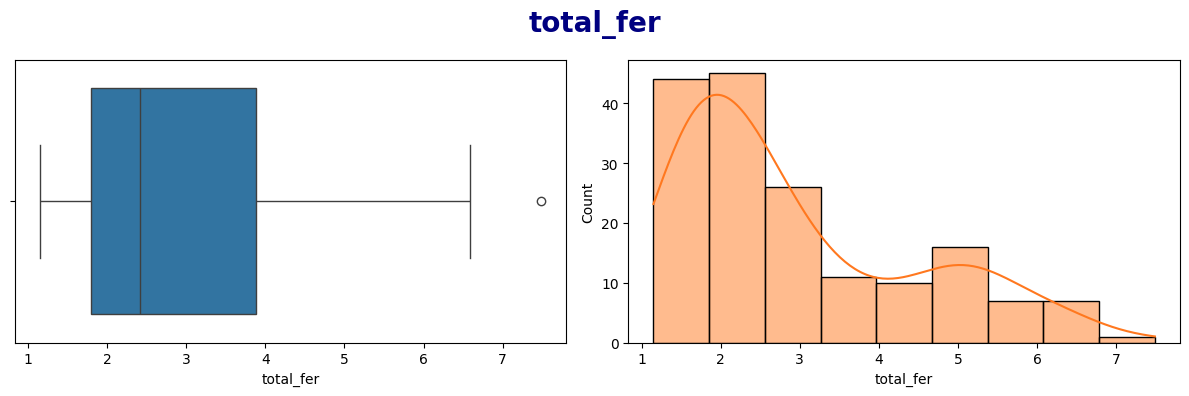

           count      mean       std   min    25%   50%   75%   max
total_fer  167.0  2.947964  1.513848  1.15  1.795  2.41  3.88  7.49


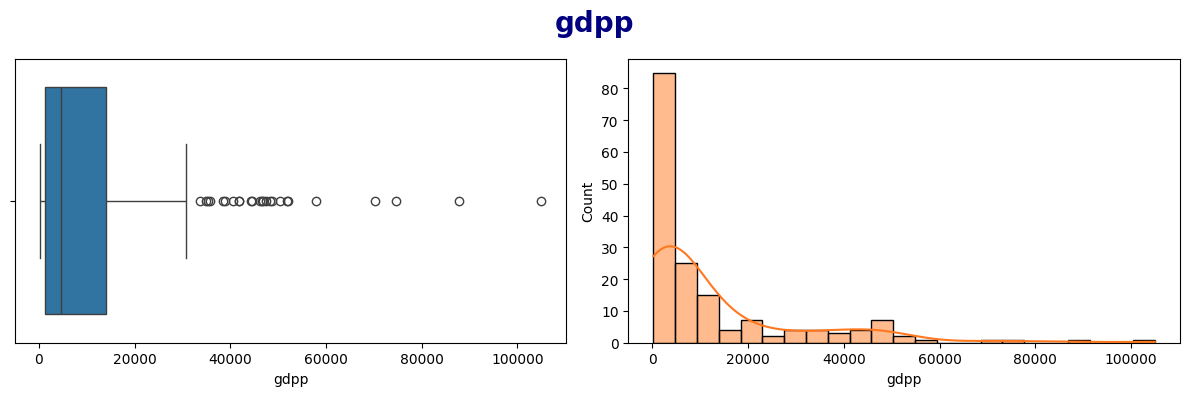

      count          mean           std    min     25%     50%      75%       max
gdpp  167.0  12964.155689  18328.704809  231.0  1330.0  4660.0  14050.0  105000.0


In [ ]:
# Separate numeric columns for statistical analysis 
numerical_col = dataset_df.select_dtypes(include='number')
num_col_names = numerical_col.columns

# Color for the plots
colors = ['#FF781F']

# create boxplots and histograms for each feature
for i in range(len(num_col_names)):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    plt.suptitle(num_col_names[i], fontsize=20, fontweight='bold', color='navy')
    # Left Plot
    sns.boxplot(data=numerical_col, x=num_col_names[i], ax=ax[0])
    # Right Plot
    sns.histplot(numerical_col[num_col_names[i]], kde=True, color=colors[0], ax=ax[1])

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plot
    plt.show()

    # print descriptive statistics
    print(dataset_df.describe().T.loc[[num_col_names[i]]].to_string())

### Distribution Observations

- **life_expec** shows a left-skewed distribution, indicating that most countries cluster around higher life expectancy values.
- **income** and **gdpp** exhibit right skewness, suggesting large disparities between wealthy and poor nations.
- **child_mort** and **total_fer** show long right tails, highlighting severe conditions in a subset of countries.

These skewed distributions reinforce the presence of significant global inequality.

In [24]:
for i in dataset_df.drop('country', axis=1).columns:

    fig = px.choropleth(dataset_df,
                        locationmode = 'country names',
                        locations = 'country',
                        title = f'{i} per country',
                        color = dataset_df[i],
                        color_continuous_scale="Teal"  
                    )

    fig.update_geos(fitbounds = "locations", visible = True)
    fig.show(engine = 'kaleido')

C:\Users\fredy\AppData\Local\Temp\ipykernel_7776\177912286.py:3: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



C:\Users\fredy\AppData\Local\Temp\ipykernel_7776\177912286.py:3: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



C:\Users\fredy\AppData\Local\Temp\ipykernel_7776\177912286.py:3: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



C:\Users\fredy\AppData\Local\Temp\ipykernel_7776\177912286.py:3: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



C:\Users\fredy\AppData\Local\Temp\ipykernel_7776\177912286.py:3: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



C:\Users\fredy\AppData\Local\Temp\ipykernel_7776\177912286.py:3: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



C:\Users\fredy\AppData\Local\Temp\ipykernel_7776\177912286.py:3: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



C:\Users\fredy\AppData\Local\Temp\ipykernel_7776\177912286.py:3: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



C:\Users\fredy\AppData\Local\Temp\ipykernel_7776\177912286.py:3: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



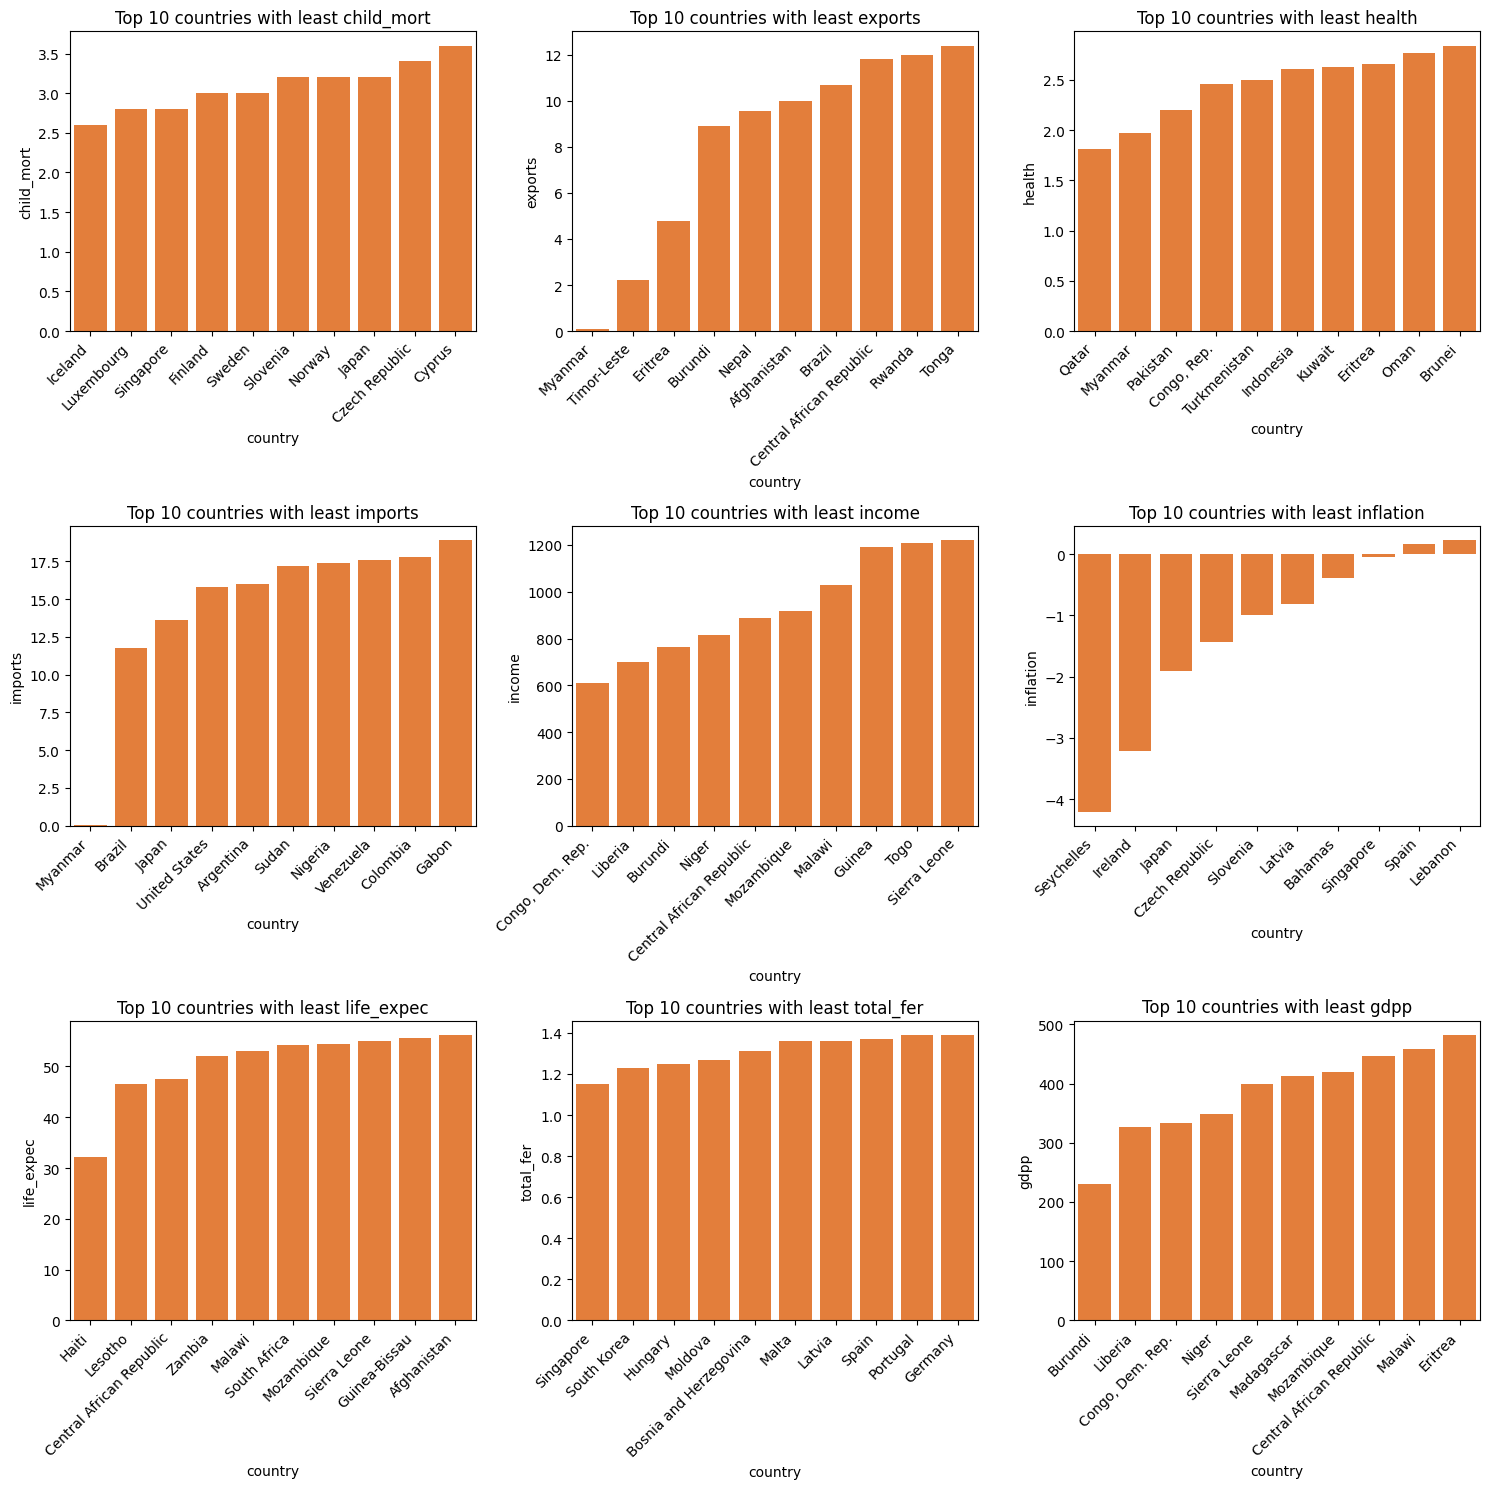

In [ ]:


# Create a 3x3 grid of subplots with specified size
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Loop through the numerical features
for i in range(len(num_col_names)):
    # Determine the row and column index for the subplot
    row = i // 3  # Row index
    col = i % 3   # Column index
    
    # filter top ten countries from the column
    top_ten = dataset_df[['country', num_col_names[i]]].sort_values(by=num_col_names[i],ascending=True)[:10]

    # Plot the top ten countries for the feature
    sns.barplot(data= top_ten,  x='country', y=num_col_names[i], color=colors[0], ax=ax[row, col])

    # adjust ticks orientation
    for label in ax[row, col].get_xticklabels():
        label.set_rotation(45)
        label.set_ha('right')
    
    # Set the title for each subplot
    ax[row, col].set_title(f'Top 10 countries with least {num_col_names[i]}')


# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

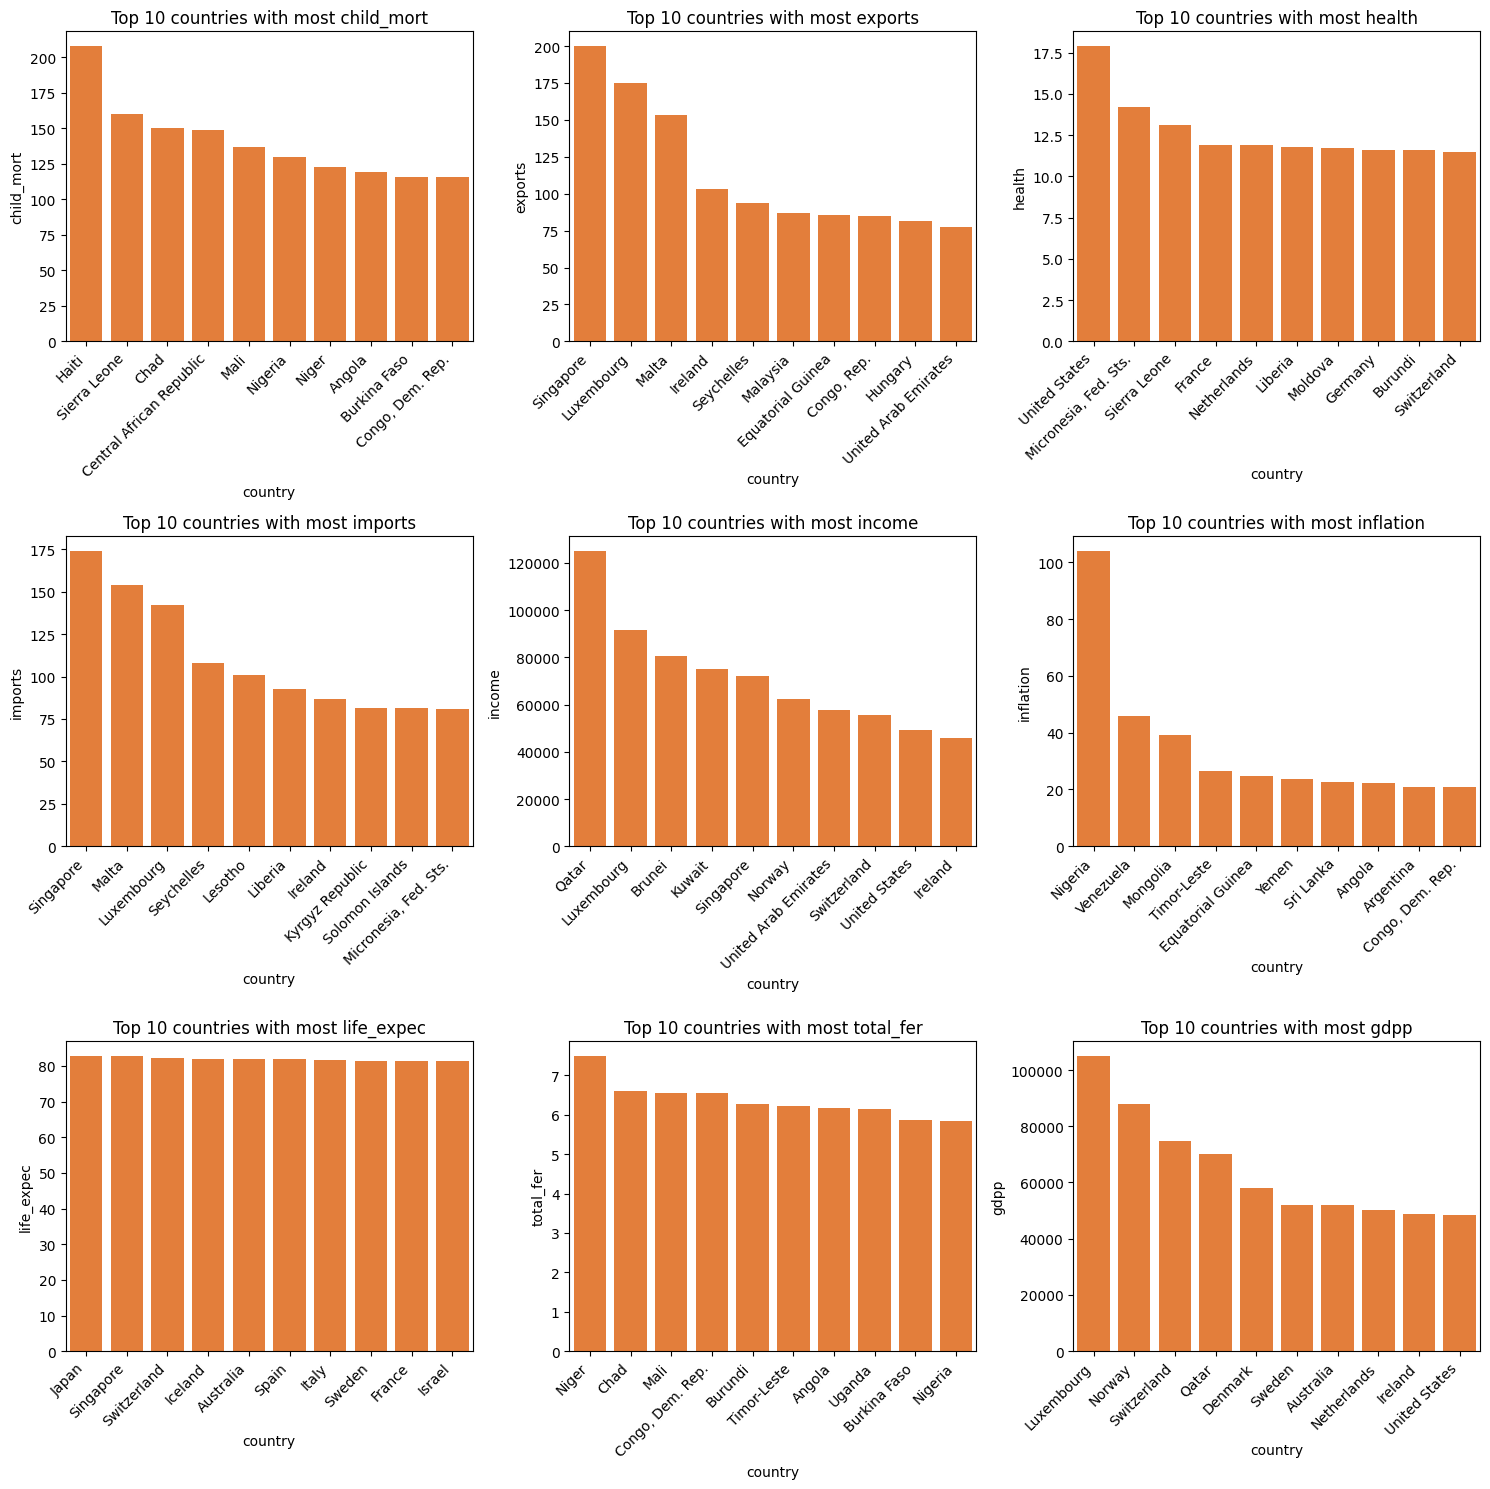

In [26]:

# Create a 3x3 grid of subplots with specified size
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Loop through the numerical features
for i in range(len(num_col_names)):
    # Determine the row and column index for the subplot
    row = i // 3  # Row index
    col = i % 3   # Column index
    
    # filter top ten countries from the column
    top_ten = dataset_df[['country', num_col_names[i]]].sort_values(by=num_col_names[i],ascending=False)[:10]
    
    # Plot the top ten countries for the feature
    sns.barplot(data= top_ten,  x='country', y=num_col_names[i], color=colors[0], ax=ax[row, col])

    # adjust ticks orientation
    for label in ax[row, col].get_xticklabels():
        label.set_rotation(45)
        label.set_ha('right')
    
    # Set the title for each subplot
    ax[row, col].set_title(f'Top 10 countries with most {num_col_names[i]}')


# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

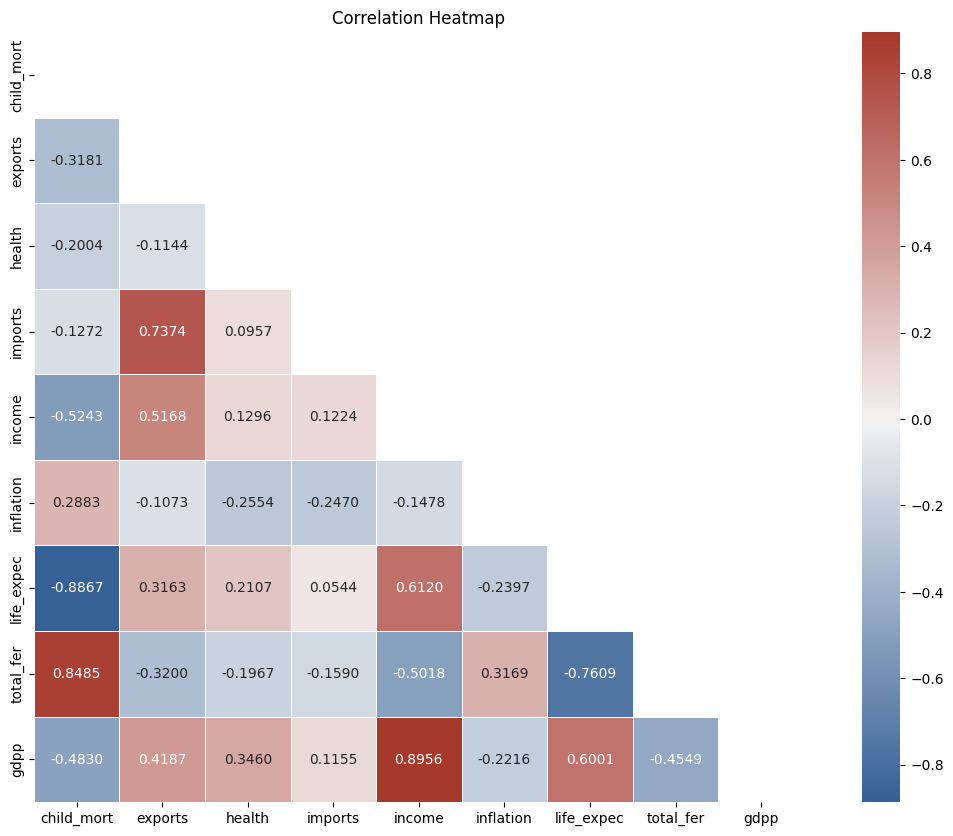

In [27]:
# Compute correlation matrix
matrix = numerical_col.corr()

# Create a mask
mask = np.triu(np.ones_like(matrix, dtype=bool))

# Create a custom diverging palette
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                            n=9, center="light", as_cmap=True)

# Visualize correlations
plt.figure(figsize=(15,10))
sns.heatmap(matrix, mask=mask, annot=True, center=0, fmt='.4f', 
            linewidths=0.5, square=True, cmap=cmap)
plt.title("Correlation Heatmap")
plt.show()

In [28]:
# Take absolute values and get the upper triangle (to avoid duplicates)
upper = matrix.where(np.triu(np.ones(matrix.shape), k=1).astype(bool))

# Unstack to long format
to_stack = upper.stack()

# Filter by level of correlation
v_strong_correlations = to_stack[abs(to_stack) > 0.8]
strong_correlations = to_stack[(abs(to_stack) >= 0.6) & (abs(to_stack) < 0.8)]
mod_correlations = to_stack[(abs(to_stack) >= 0.4) & (abs(to_stack) < 0.6)]
weak_correlations = to_stack[(abs(to_stack) >= 0.2) & (abs(to_stack) < 0.4)]
very_weak_correlations = to_stack[abs(to_stack) < 0.2]

print('==Very Strong Correlations==')
print(v_strong_correlations)

print('\n==Strong Correlations==')
print(strong_correlations)

print('\n==Moderate Correlations==')
print(mod_correlations)

print('\n==Weak Correlations==')
print(weak_correlations)

print('\n==Very Weak Correlations==')
print(very_weak_correlations)

==Very Strong Correlations==
child_mort  life_expec   -0.886676
            total_fer     0.848478
income      gdpp          0.895571
dtype: float64

==Strong Correlations==
exports     imports       0.737381
income      life_expec    0.611962
life_expec  total_fer    -0.760875
            gdpp          0.600089
dtype: float64

==Moderate Correlations==
child_mort  income      -0.524315
            gdpp        -0.483032
exports     income       0.516784
            gdpp         0.418725
income      total_fer   -0.501840
total_fer   gdpp        -0.454910
dtype: float64

==Weak Correlations==
child_mort  exports      -0.318093
            health       -0.200402
            inflation     0.288276
exports     life_expec    0.316313
            total_fer    -0.320011
health      inflation    -0.255376
            life_expec    0.210692
            gdpp          0.345966
imports     inflation    -0.246994
inflation   life_expec   -0.239705
            total_fer     0.316921
            gdpp 

## Interpretation of the Correlation Matrix

### A. Health & Demographic Indicators

**Child Mortality vs Life Expectancy (r = −0.89)**  
- Extremely strong negative correlation  
- Countries with high child mortality tend to have significantly lower life expectancy  

These two variables capture the same underlying health conditions from opposite perspectives.

**Child Mortality vs Total Fertility (r = +0.85)**  
- Very strong positive correlation  
- Higher fertility rates are associated with higher child mortality  

This indicates overlapping demographic and health dynamics.

**Life Expectancy vs Total Fertility (r = −0.76)**  
- Strong inverse relationship  
- Countries with higher fertility rates generally exhibit lower life expectancy  

**Conclusion (Health & Demographics):**  
Child mortality, life expectancy, and total fertility form a tightly correlated health–demographic cluster, indicating substantial redundancy among these variables.

---

### B. Economic Indicators

**Income vs GDP per Capita (r = +0.90)**  
- Nearly perfect positive correlation  
- Both variables measure economic prosperity on a per-person basis  

Including both variables would result in double-counting economic development in distance-based clustering models.

**Income vs Life Expectancy (r = +0.61)**  
- Moderate to strong positive correlation  
- Wealthier countries tend to have longer life expectancy, consistent with development theory  

**GDP per Capita vs Life Expectancy (r = +0.60)**  
- Similar pattern to income, though slightly weaker  

**Conclusion (Economic Indicators):**  
Income and GDP per capita represent nearly identical economic signals, making one of them sufficient for clustering.

---

### C. Trade Indicators

**Exports vs Imports (r = +0.74)**  
- Strong but not perfect correlation  
- Countries engaged in global trade tend to both import and export extensively  

These variables primarily reflect trade openness rather than humanitarian need.

---

### D. Inflation

**Inflation Relationships**  
- Inflation shows weak correlations with all other variables (|r| < 0.35)  
- Indicates relative independence from other socio-economic indicators  

This makes inflation a valuable feature for capturing economic instability without introducing redundancy.

---

### Overall Conclusion

The correlation analysis reveals clear redundancy among health and economic indicators, while trade and inflation provide more distinct information. These findings motivate the use of dimensionality reduction techniques such as PCA prior to clustering.


## Feature Reduction Considerations

Highly correlated variables can distort distance-based clustering models.

While PCA will later address multicollinearity, this correlation analysis:
- Justifies dimensionality reduction
- Helps interpret PCA components meaningfully
- Confirms that development-related variables dominate the data structure

## Feature recommendations

Features to remove due to redunacy:
- income, life_expec, and total_fer

Features to keep:
- child_mort - Strong humanitarian urgency indicator
- gddp - Overall economic development
- health - Government health investment
- inflation - Economic instability
- exports - Trade capacity
- iimports - Trade Dependency

## Relevance to Fund Allocation

The exploratory analysis confirms:
- Wide disparities in health, income, and mortality across countries
- Natural grouping potential based on development and vulnerability
- Suitability of unsupervised learning for identifying priority clusters

These insights directly inform the next phase: **standardization, PCA, and clustering**.